###sun flux

In [2]:
%matplotlib inline

\begin{equation}
    Sq \ [SFU] = 26.4 + 12.4 \ \nu + 1.11\ \nu^2 \\ \rm for \  (1 < \nu(GHz) < 20) 
\end{equation}

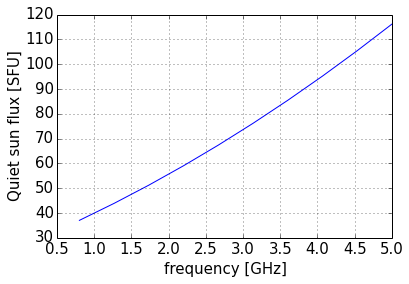

In [2]:
f = np.linspace(0.8,5,10)
sq = 26.4 + 12.4*f + 1.11*f**2 
plt.plot(f,sq)
plt.xlabel('frequency [GHz]')
plt.ylabel('Quiet sun flux [SFU]')
plt.grid()

\begin{equation}
    Sv  \ [SFU]= \frac{0.64 \cdot( F10.7 - 70 ) \nu^{0.4}}{ 1 + 1.56 \cdot( \ln \ (\nu  \ / \  2.9 ) )^2}
\end{equation}

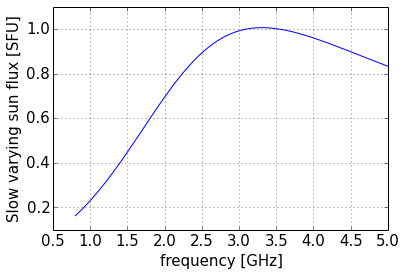

In [5]:
f = np.linspace(0.8,5,100)
sv = (0.64*f**0.4)/(1+ 1.56*(np.log(f/2.9))**2)
plt.plot(f,sv)
plt.xlabel('frequency [GHz]')
plt.ylabel('Slow varying sun flux [SFU]')
plt.grid()

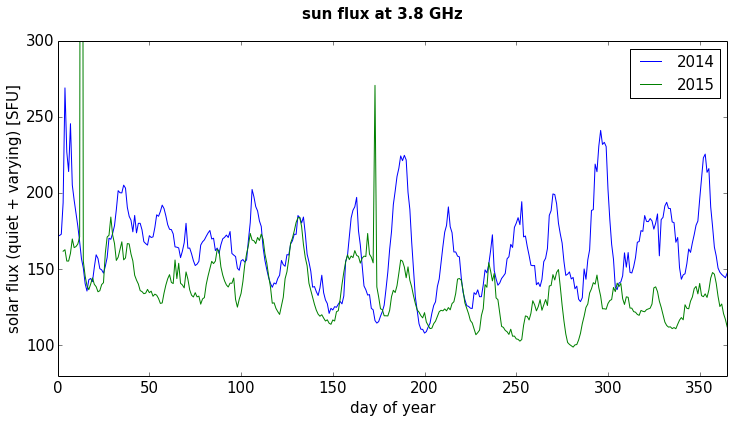

In [11]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/sundata/')
%run convertfreq.py

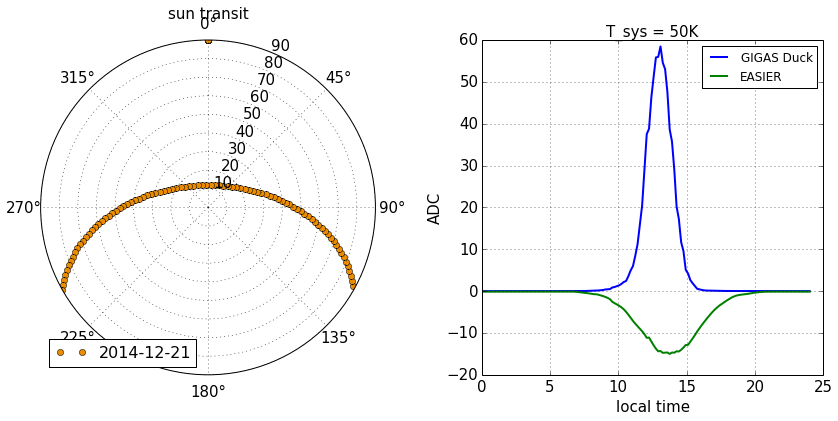

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/suntransit/script/test/')
%run testdailyflux.py 2014 12 21

In [1]:
%load_ext autoreload
%autoreload 2
#new way to load data
# the basic cuts are already in the select leaf
%matplotlib inline 
srcpwd = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/script'
utilspath =srcpwd + '/utils/'
sys.path.append(utilspath)
import utils
classpath = srcpwd + '/classes/'
sys.path.append(classpath)
import dataset
#datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/332_333/'
datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/easier7/'
#fname = 'Antenna_2014-01-01_2014-01-30.root'
fname = 'Antenna_2014-01-01_2014-12-31.root'                                                                                                        
file = datafolder + fname

data = dataset.Dataset(file)
data.loaddata()
pfile = '/Users/romain/work/Auger/EASIER/LPSC/suntransit/data/period/controlperiod_Tsys_50K_below_2adc.txt'
data.loadperiod(pfile)   

Welcome to ROOTaaS 6.06/00


In [41]:
#load the data for 343
data343 = data.getnewdatawithid(343)
pfile = '/Users/romain/work/Auger/EASIER/LPSC/suntransit/data/period/controlperiod_Tsys_50K_below_2adc.txt'
data343.loadperiod(pfile)                                                                                                                       
data343.selectleafs()

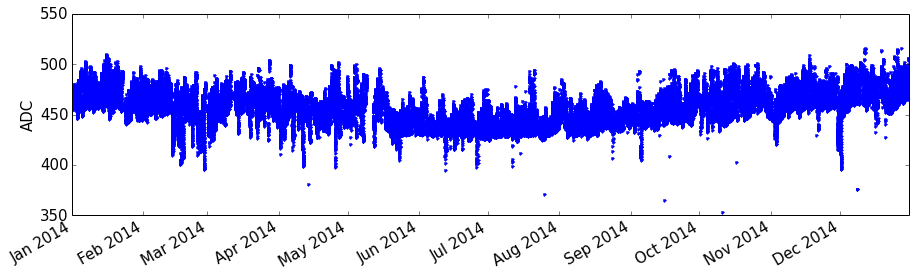

In [26]:
fig = plt.figure(figsize=(15,4))
plt.plot(data343.date,data343.radio,'.')
plt.ylim(350,550)
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

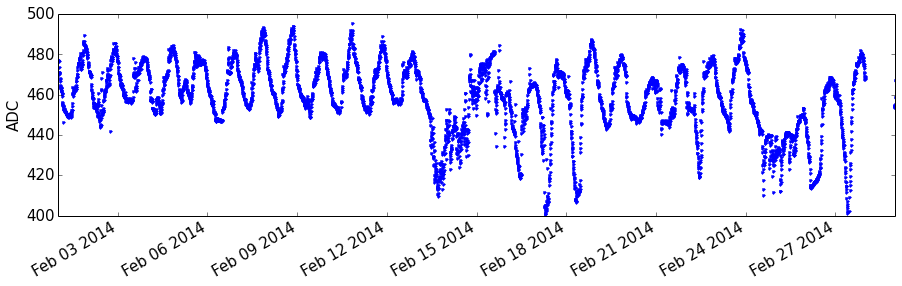

In [25]:
fig = plt.figure(figsize=(15,4))
t0 = utils.datettotimestamp(datetime.datetime(2014,2,1,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,2,28,23,59,00))
mdata343 = data343.getnewdataset(t0,t1)

plt.plot(mdata343.date,mdata343.radio,'.')
plt.ylim(400,500)
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

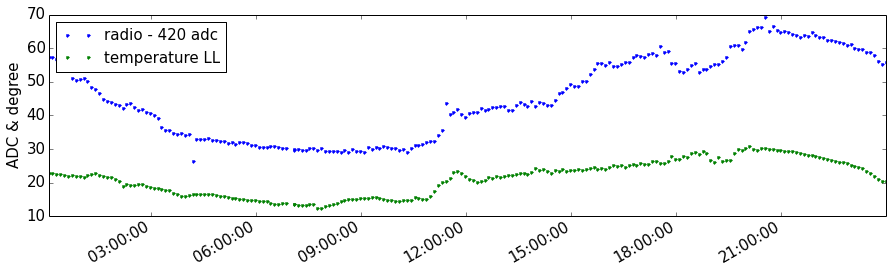

In [27]:
fig = plt.figure(figsize=(15,4))
t0 = utils.datettotimestamp(datetime.datetime(2014,2,1,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,2,1,23,59,00))
ddata343 = data343.getnewdataset(t0,t1)

plt.plot(ddata343.date,ddata343.radio-420,'.',label='radio - 420 adc')
plt.plot(ddata343.date,ddata343.tempLL,'.',label='temperature LL')

#plt.ylim(400,500)
plt.legend(loc=2,fontsize=15)
plt.ylabel('ADC & degree')
plt.gcf().autofmt_xdate()

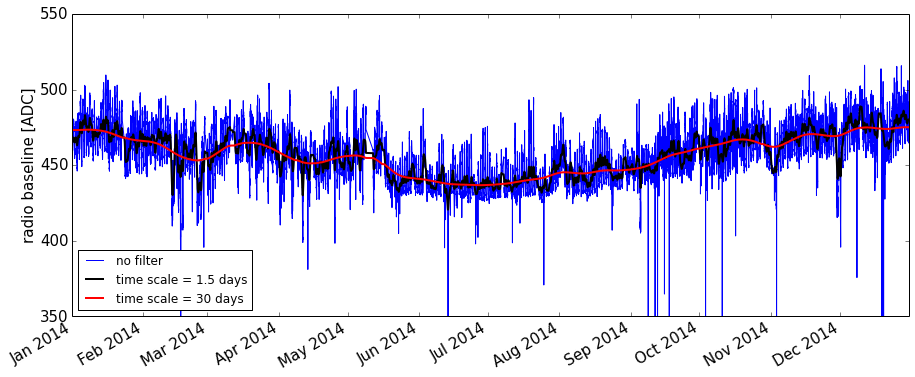

In [50]:
deltat343 = data343.time[1] - data343.time[0]
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(111)
#ax2 = plt.subplot(212)
#tcuts = [1,7,30,150]
tcuts = [1.5*24,30*24]
col = ['k','r']
counter = 0
ax1.plot(data343.date,data343.radio,c='b',lw=1,label='no filter')
for t,c in zip(tcuts,col):
    fcut = 1./(t*3600)
    radiof343 = utils.lowpass(data343.radio,1./(deltat343),2,fcut)
    lw = 1
    if counter > 0:
        lw = 3

    ax1.plot(data343.date,radiof343,c=c,lw=2,label='time scale = '+str(t/24) +' days')
#    ax1.plot(data333.date,radiof333,c=c,lw=lw,label='time scale = '+str(t/24) +' days')
    counter+=1

plt.ylim(350,550)
plt.ylabel('radio baseline [ADC]')
plt.legend(loc=3)
plt.gcf().autofmt_xdate()

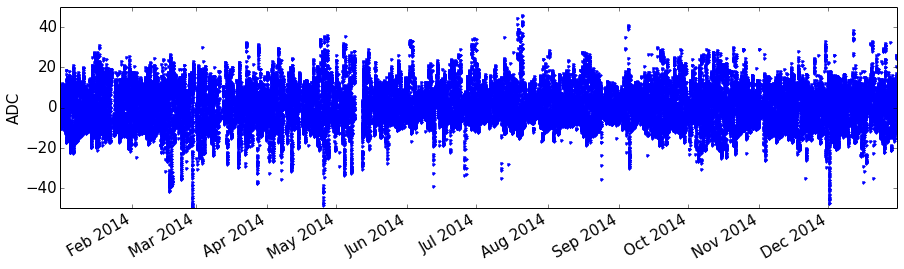

In [51]:
t0 = utils.datettotimestamp(datetime.datetime(2014,1,1,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,12,31,23,59,00))
fdata343 = data343.getnewdataset(t0,t1)

fdata343.filterHP(1.5)
fig = plt.figure(figsize=(15,4))
plt.plot(fdata343.date,fdata343.radio,'.')
plt.ylim(-50,50)
plt.ylabel('ADC')
plt.gcf().autofmt_xdate()

<matplotlib.colorbar.Colorbar instance at 0x131455320>

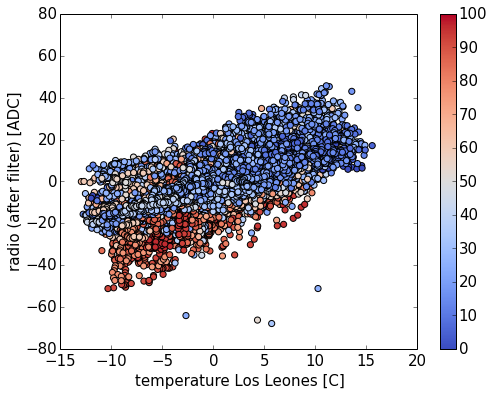

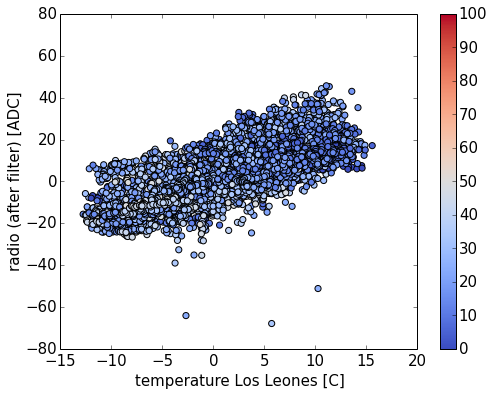

In [57]:
fig1 = plt.figure(figsize=(8,6))
plt.scatter(fdata343.tempLL, fdata343.radio, marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =fdata343.humLL, cmap=plt.cm.coolwarm)
plt.ylim(-80,80)
plt.xlabel('temperature Los Leones [C]')
plt.ylabel('radio (after filter) [ADC]')
plt.colorbar()

fig2 = plt.figure(figsize=(8,6))
plt.scatter(fdata343.tempLL[fdata343.humLL < 50], fdata343.radio[fdata343.humLL < 50], marker='.',s=150, linewidths=1,vmin=0, vmax=100, c =fdata343.humLL[fdata343.humLL < 50], cmap=plt.cm.coolwarm)
plt.ylim(-80,80)
plt.xlabel('temperature Los Leones [C]')
plt.ylabel('radio (after filter) [ADC]')
plt.colorbar()

(-40, 60)

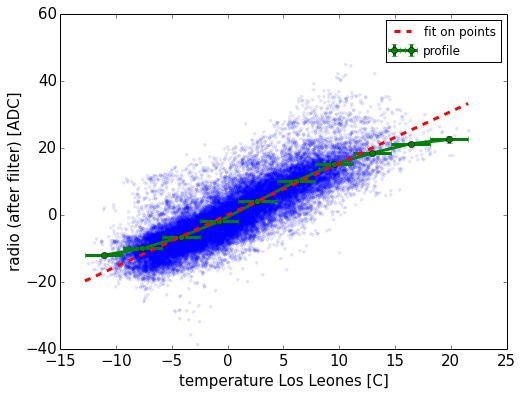

In [96]:
cdata343 = data343.getnewdatasetcond(np.where( (data343.period == 1) & (data343.humLL < 50) ) )
cdata343.filterHP(1.5)
fit0 = np.polyfit(cdata343.tempLL,cdata343.radio,1)
p0 = np.poly1d(fit0)
prof = utils.makeprofile(cdata343.tempLL,cdata343.radio,10,np.min(cdata343.tempLL),np.max(cdata343.tempLL))
#prof = utils.makeprofile(cdata343.tempLL,cdata343.radio,10,-10,15)
fig = plt.figure(figsize=(8,6))
plt.plot(cdata343.tempLL,cdata343.radio,'.',alpha=0.1,zorder=-32)
plt.errorbar(prof[0],prof[1],xerr=prof[2],yerr=prof[3],marker='o',lw=3,label='profile')
temp = np.linspace(np.min(cdata343.tempLL),np.max(cdata343.tempLL),10)
plt.plot(temp, p0(temp),'r--',lw=3,label='fit on points')
plt.legend()
plt.xlabel('temperature Los Leones [C]')
plt.ylabel('radio (after filter) [ADC]')


plt.ylim(-40,60)
#plt.plot(prof[0],pprof(prof[0]),'k--',lw=1,label='fit on profile')

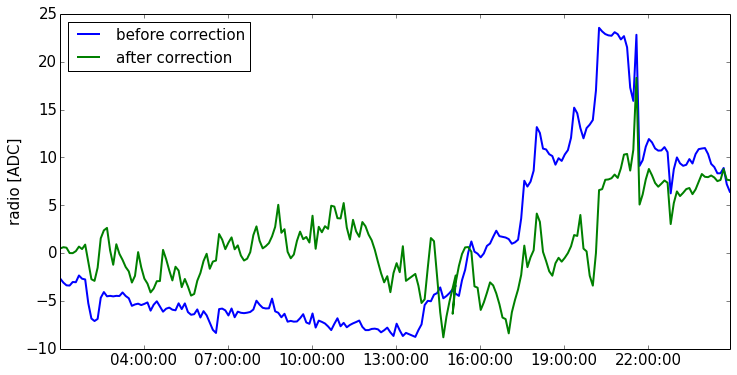

In [95]:
corrdata343 = data343.getnewdatasetcond(np.where( (data343.period == 1) & (data343.humLL < 50) ) )
corrdata343.filterHP(1.5)
corrdata343.tempcorrection(1)
t0 = utils.datettotimestamp(datetime.datetime(2014,6,21,0,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,6,21,23,59,00))
ncorrdata343 = corrdata343.getnewdataset(t0,t1)
#ndata343 = data343.getnewdataset(t0,t1)

fig = plt.figure(figsize=(12,6))
plt.plot(ncorrdata343.date, ncorrdata343.radio, lw=2,label='before correction')
plt.plot(ncorrdata343.date, ncorrdata343.radioc, lw=2,label='after correction')
plt.ylabel('radio [ADC]')
plt.legend(loc=2, fontsize=15)

#plt.plot(ncorrdata343.date, ncorrdata343.tempLL)